#### Veriyi anlama ve veriyi analiz etme veri bilimcide olması gereken en önemli özelliklerdendir.

![](https://cdn-images-1.medium.com/max/900/0*d0zoc3JZ2uwDwjuC)

[Unsplash](https://unsplash.com/?utm_source=medium&utm_medium=referral)'de [Eduardo Soares](https://unsplash.com/@eduschadesoares?utm_source=medium&utm_medium=referral) tarafından bir fotoğraf 

---

Bu yazımda beraber bir kısa bi veri analizi yapıcaz.

Yazımda [**supermarket verisetini**](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales) kullanıcam.

## **Hadi başlayım o zaman!**

# Gerekli kütüphaneleri ekleyelim

In [1]:
import numpy as np
# NumPy kütüphanesi sayısal işlemleri hızlı ve kolay yapmak için

import pandas as pd
# pandas DataFrameler ile ilgili operasyonlar için

import seaborn as sns
# seaborn veri görselleştirme kütüphanesi

import matplotlib.pyplot as plt
# matplotlib de veri görselleştirme kütüphanesi
%matplotlib inline

import warnings
# Bazı gereksiz hataları göstermemek için
warnings.filterwarnings("ignore")

# Verimizi okuyalım

Eğer veri nasıl okunur bilmiyorsanız [**bu yazıyı**](https://www.kaggle.com/code/ahmettalhabektastr/veri-d-nyas-na-lk-ad-mlar) okumanızı tavsiye ediyorum.

In [2]:
df=pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
#Pandas kullanarak veriyi okuyoruz

# EDA

Eğer ki **EDA** ile tanışmadıysan ve **EDA**'yı tanımıyorsan [**bu yazıyı**](https://www.kaggle.com/code/ahmettalhabektastr/yeni-arkada-m-z-eda) okumalısın.

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [7]:
df.sample(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
390,541-89-9860,C,Naypyitaw,Member,Female,Fashion accessories,80.48,3,12.0720,253.5120,2/15/2019,12:31,Cash,241.44,4.761905,12.0720,8.1
972,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,7,30.4780,640.0380,1/26/2019,15:17,Cash,609.56,4.761905,30.4780,5.5
746,457-13-1708,B,Mandalay,Member,Male,Fashion accessories,65.23,10,32.6150,684.9150,1/8/2019,19:07,Credit card,652.30,4.761905,32.6150,5.2
944,333-23-2632,A,Yangon,Member,Male,Health and beauty,10.08,7,3.5280,74.0880,3/28/2019,20:14,Cash,70.56,4.761905,3.5280,4.2
198,699-01-4164,C,Naypyitaw,Normal,Male,Health and beauty,41.50,4,8.3000,174.3000,3/12/2019,19:58,Credit card,166.00,4.761905,8.3000,8.2
187,732-04-5373,B,Mandalay,Member,Male,Home and lifestyle,46.47,4,9.2940,195.1740,2/8/2019,10:53,Cash,185.88,4.761905,9.2940,7.0
751,585-86-8361,A,Yangon,Normal,Female,Food and beverages,27.28,5,6.8200,143.2200,2/3/2019,10:31,Credit card,136.40,4.761905,6.8200,8.6
659,491-38-3499,A,Yangon,Member,Male,Fashion accessories,55.45,1,2.7725,58.2225,2/26/2019,17:46,Credit card,55.45,4.761905,2.7725,4.9
232,418-02-5978,B,Mandalay,Normal,Female,Health and beauty,84.09,9,37.8405,794.6505,2/11/2019,10:54,Cash,756.81,4.761905,37.8405,8.0
307,803-17-8013,A,Yangon,Member,Female,Home and lifestyle,88.79,8,35.5160,745.8360,2/17/2019,17:09,Cash,710.32,4.761905,35.5160,4.1


# Derine inelim

In [8]:
df["City"].unique()
#City sütununun değerleri

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [9]:
df.Branch.nunique()
#Kaç tane şube var

3

In [10]:
df.Branch.unique()
#Şube isimleri

array(['A', 'C', 'B'], dtype=object)

In [11]:
df.Total.max()
#En fazla tutan fiş

1042.65

In [12]:
df.Total.max(),df.Total.min(),df.Total.std(),df.Total.var(),df.Total.mean(),df.Total.mode()
#Birçok istatiksel değerler:
#sırasıyla: Maksimum, Minimum, Standart sapma, Varyans, Ortalama ve Mod

(1042.65,
 10.6785,
 245.88533510097187,
 60459.598017717224,
 322.966749,
 0     87.2340
 1     93.7440
 2    175.9170
 3    189.0945
 4    216.8460
 5    217.6335
 6    263.9700
 7    276.9480
 8    470.9880
 9    829.0800
 dtype: float64)

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [14]:
df.describe(include="O")
#Object verilerin değerleri

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


# Tarih verileri ile uğraşma

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
df["Date"]=pd.to_datetime(df["Date"])
#Date sütununu object veri tipinde datetime veri tipine dönüştürdüm

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [18]:
df["day"]=(df["Date"]).dt.day
#day isminde yeni bir sütun oluşturup içine gün verilerini çektim

df["month"]=(df["Date"]).dt.month
#month isminde yeni bir sütun oluşturup içine ay verilerini çektim

df["year"]=(df["Date"]).dt.year
#year isminde yeni bir sütun oluşturup içine yıl verilerini çektim

df["month_name"]=(df["Date"]).dt.month_name()
#month_name isminde yeni bir sütun oluşturup içine ay isimlerini çektim

df["weekday"]=(df["Date"]).dt.day_name()
#weekday isminde yeni bir sütun oluşturup içine haftanın günlerinin isimlerini çektim

In [19]:
#Hadi yeni veri setimize bakalım
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday


In [20]:
#Bütün sütunları göremiyorum, bu yüzden alttaki kodu çalıştırcam.
pd.set_option("display.max_columns",25)
#25 taneye kadar sütun göster demek

In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [23]:
df["Time"]=pd.to_datetime(df["Time"])
#Time sütununu object veri tipinde datetime veri tipine dönüştürdüm

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [25]:
df["Hour"]=(df["Time"]).dt.hour
#Hour isminde yeni bir sütun oluşturup içine saat verilerini çektim

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,month_name,weekday,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-23 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,January,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-23 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,March,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-23 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,March,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-03-23 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,January,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-03-23 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,February,Friday,10


# Veri Görselleştirme

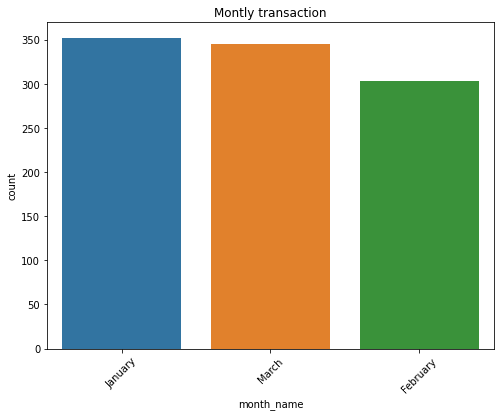

In [27]:
plt.figure(figsize=(8,6))
#bir matplotlib grafiği oluşturmak için bir figür nesnesi oluşturur ve boyutunu (8,6) olarak ayarlar.

plt.title("Montly transaction")
#Bu kod, grafiğin başlığını "Montly transaction" olarak ayarlar

sns.countplot(x=df.month_name)
#"month_name" sütununa göre bir çubuk grafiği oluşturur.

plt.xticks(rotation=45); 
#x ekseni etiketlerinin yönünü 45 dereceye ayarlar, böylece etiketler daha okunaklı hale gelir.

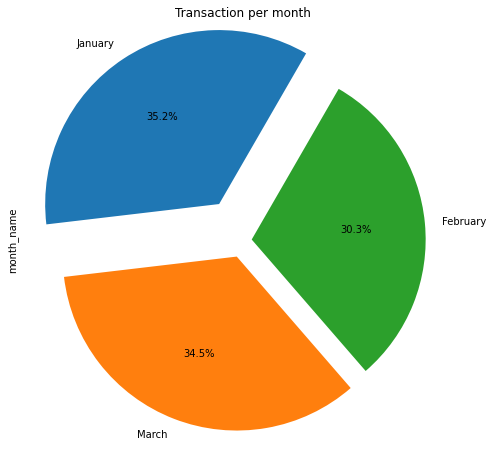

In [28]:
plt.figure(figsize=(8,8))

explode=(0.25,0.10,0.05)
#Pasta grafiğindeki dilimlerin çıkartılacağı oranları belirler. 
#İlk dilim %25 oranında çıkarılırken, ikinci dilim %10 ve üçüncü dilim %5 oranında çıkarılır

df["month_name"].value_counts().plot.pie(autopct="%1.1f%%",startangle=60,explode=explode)
#pie() fonksiyonunu kullanarak pasta grafiği oluşturur.
#autopct="%1.1f%%" yüzde değerlerini göstermek için kullanılır
#startangle=60 başlangıç açısını 60 derece olarak ayarlar
#explode=explode parametresi, pasta dilimlerinin çıkarılacağı oranları belirler.

plt.title("Transaction per month");

> **Gördüğümüz gibi, bu süpermarketin Ocak ayında diğer iki aya göre daha fazla işlemi var.**

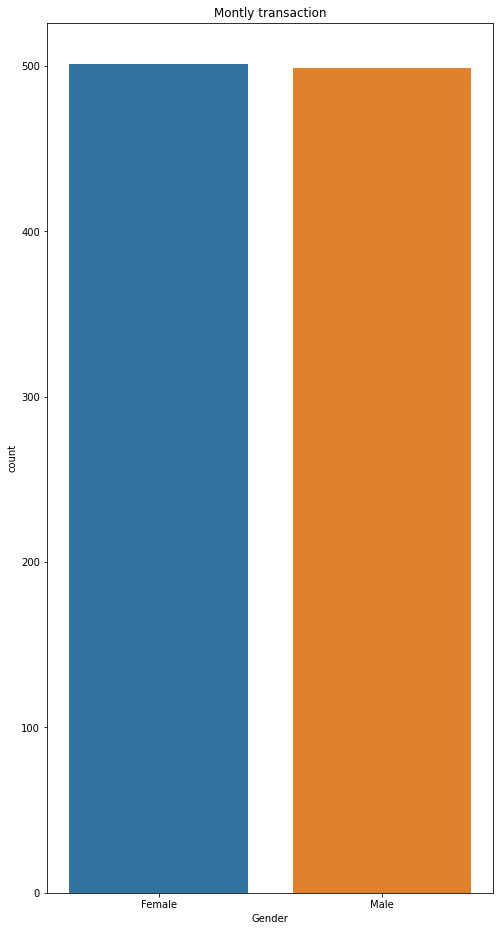

In [29]:
plt.figure(figsize=(8,16))

plt.title("Montly transaction")

sns.countplot(x=df["Gender"]);

> **Kadınlar ve erkekler arasında çok küçük bir fark var**

**Hadi arada ne kadar fark olduğuna bakalım!**

In [30]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

***Sadece 2 kişilik fark var***

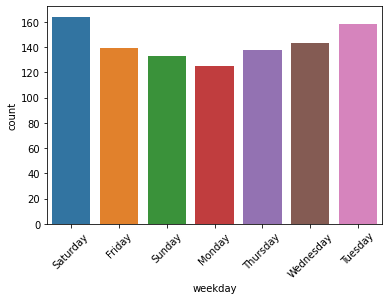

In [31]:
sns.countplot(x=df.weekday)
plt.xticks(rotation=45);

> En kalabalık gün Cumartesi. Muhtemelen Cumartesi tatil olduğundandır.


> Ancak Pazartesi en sakin gündür. İlginç olan Salı, en kalabalık ikinci gün. Salı, Pazar'dan bile daha kalabalık. Neden?


> Muhtemelen cumartesi alınan yiyecekler bitiyordur😅

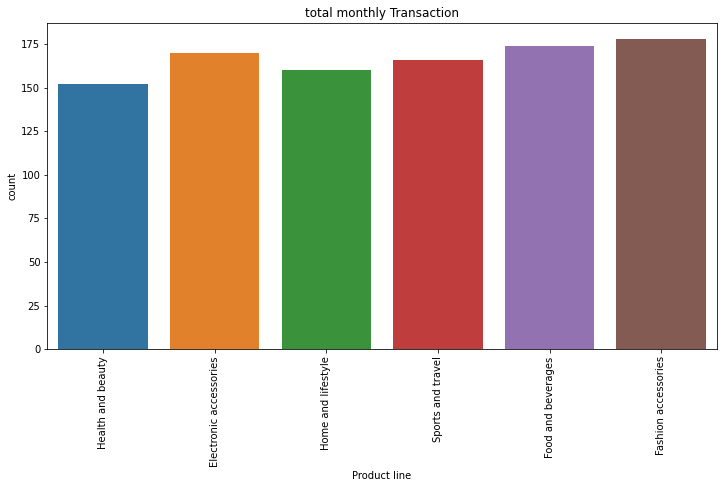

In [32]:
plt.figure(figsize=(12,6))
plt.title("total monthly Transaction")
sns.countplot(x=df["Product line"])
plt.xticks(rotation=90); 

## Pasta grafiğinde görelim!

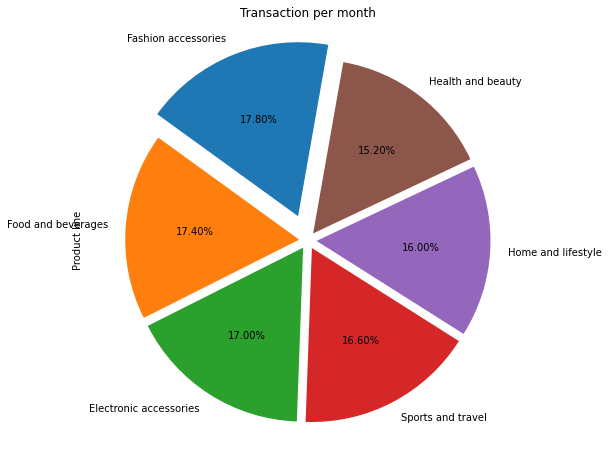

In [33]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode)

plt.title("Transaction per month");


> Woow Moda aksesuarları (Fashion accessories) diğerlerinden daha fazla, hatta yiyeceklerden bile daha fazla :D


> Belki de grafiğe cinsiyetlere göre bakmalıyız.

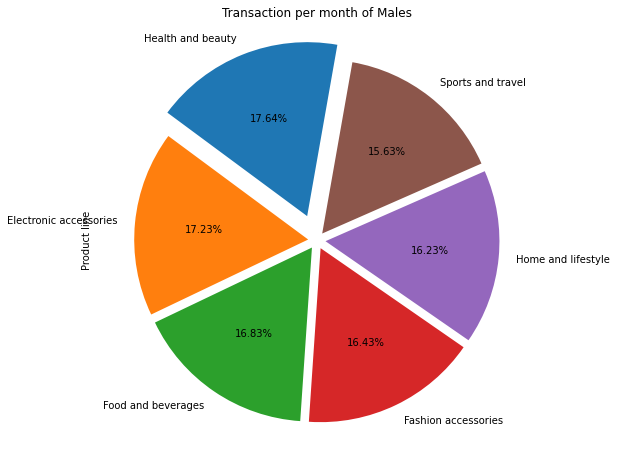

In [34]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"][df["Gender"]=="Male"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Males");


## **Bu grafik, aylık erkeklerin satın alımlarını gösteriyor.**


> **Şimdi grafik değişti. Moda aksesuarları (Fashion accessories) birincilikten dördüncü sıraya geçti. Ve şimdi ilk sırada Sağlık ve Güzellik (Health and Beauty) ürünleri var. Erkeklerin güzelliğine önem vermediğini kim söyledi? Şaka yapıyorum, böyle bir çıkarım yapılamaz ama belki de kız arkadaşları ya da anneleri için aldılar. Kim bilir?**


> **Elektronik aksesuarları (Electronic accessories) Sağlık ve Güzellik (Health and Beauty) aksesuarlarının yanına koymak süpermarketlerdeki satışları artırabilir.**

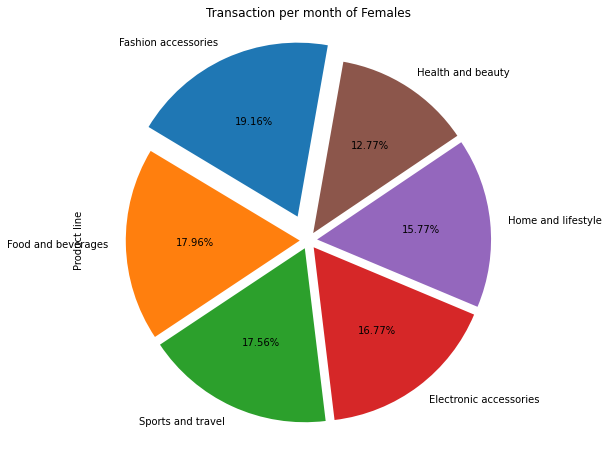

In [35]:
plt.figure(figsize=(8,8))

explode=(0.15,0.05,0.05,0.05,0.05,0.05)

df["Product line"][df["Gender"]=="Female"].value_counts().plot.pie(autopct="%1.2f%%",startangle=80,explode=explode,)

plt.title("Transaction per month of Females");


## Bu grafik, aylık kadınların  satın alımlarını gösterir.
> **Beklediğimiz gibi, Moda aksesuarları (Fashion accessories) geniş bir farkla önde.**

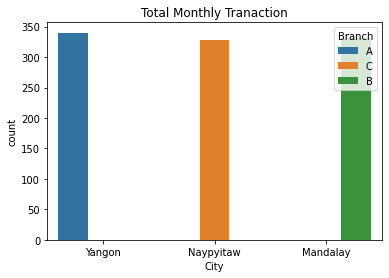

In [36]:
plt.title("Total Monthly Tranaction")
sns.countplot(x=df["City"],hue = df["Branch"]);

>  Müşterilerin çoğu Yangon şehrinden.

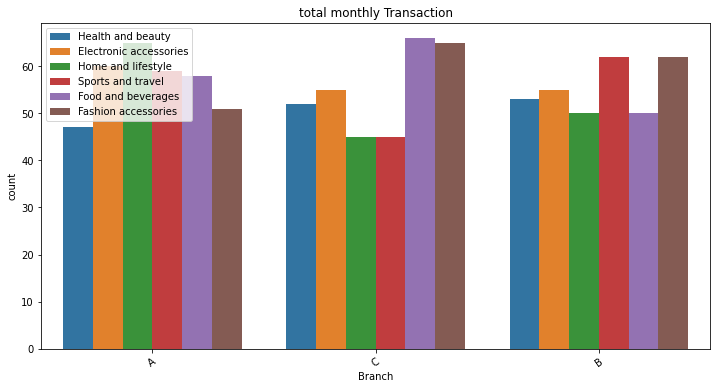

In [37]:
plt.figure(figsize=(12,6))
plt.title("total monthly Transaction")
sns.countplot(x=df["Branch"],hue=df["Product line"])
plt.xticks(rotation=35)
plt.legend(loc="best"); 
plt.show()

> Gördüğünüz gibi, popülerlik ve ihtiyaçlar konuma göre değişebilir.

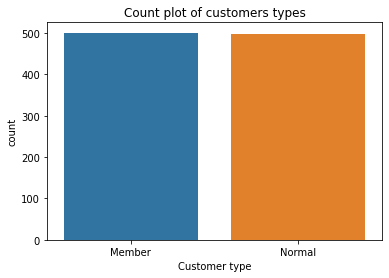

In [38]:
plt.title("Count plot of customers types")
sns.countplot(x=df["Customer type" ]);

- Bunlar hemen hemen eşit

In [39]:
df["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

- Sadece 2 fark var

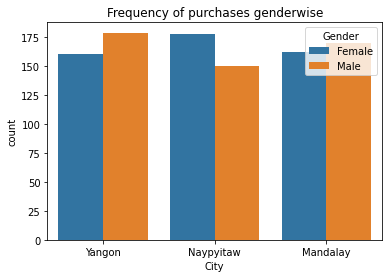

In [40]:
plt.title("Frequency of purchases genderwise")
sns.countplot(x=df.City,hue=df.Gender);
#Şehirlere göre cinsiyetler

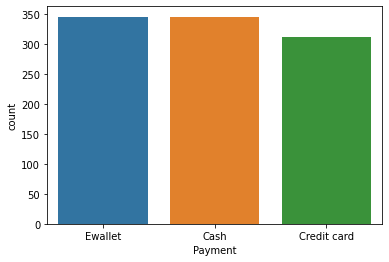

In [41]:
sns.countplot(x=df.Payment);

> **Kredi Kartı diğerlerine göre birazcık daha az**

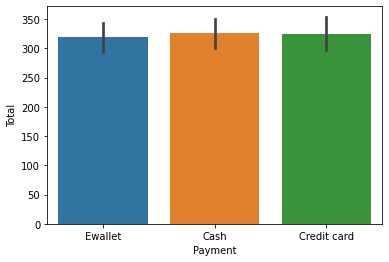

In [42]:
sns.barplot(x=df.Payment,y=df["Total"]);

> **Toplam artarken daha yüksek Kredi Kartı ve E-cüzdan görmeyi bekliyordum. Dolayısıyla bu verilerin 2019'un başlarında olduğunu unutmamalı ve bugünü değil o tarihi düşünmeliyiz. Pandemi çoğu kişi fiziksel paradan sanal paraya yöneldi.**

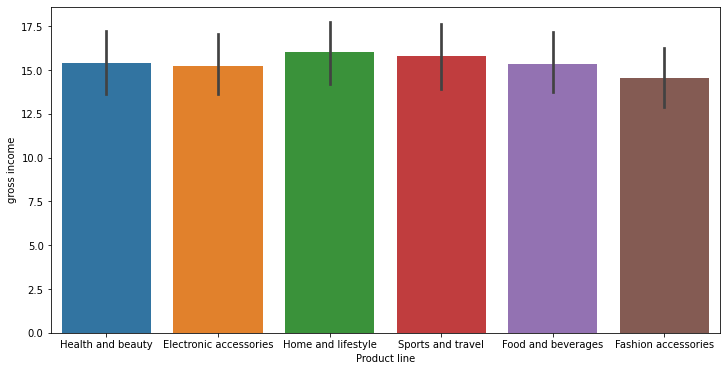

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Product line"],y=df["gross income"]);

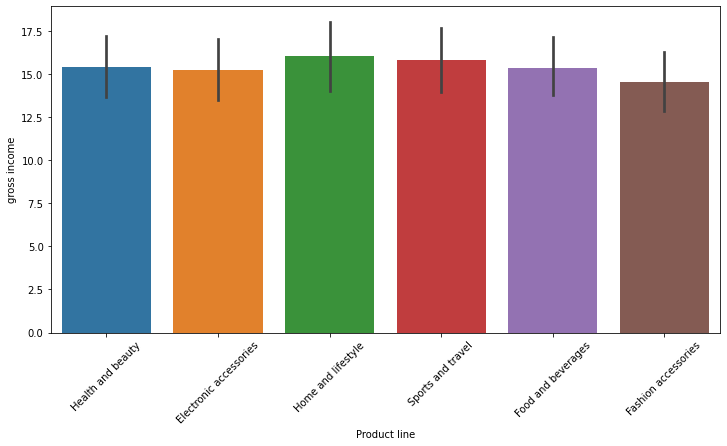

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Product line"],y=df["gross income"])
plt.xticks(rotation=45);

> **Ev ve yaşam tarzı (Home and lifestyle) brüt geliri diğerlerinden daha fazladır.**

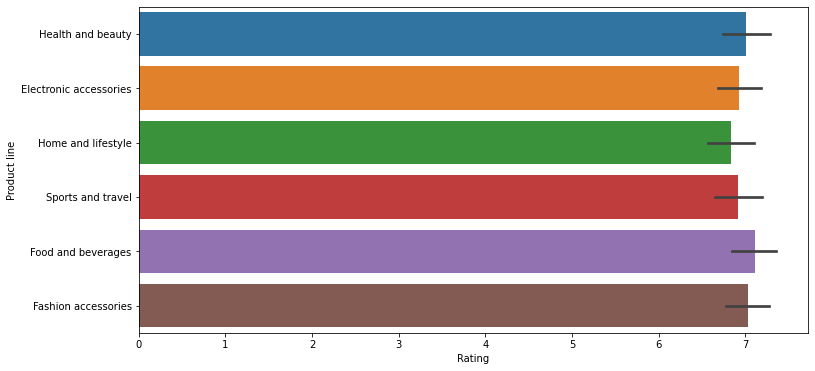

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(y=df["Product line"],x=df["Rating"]);

> **Derecelendirme ve aksesuarlar arasında büyük farklar yok.**

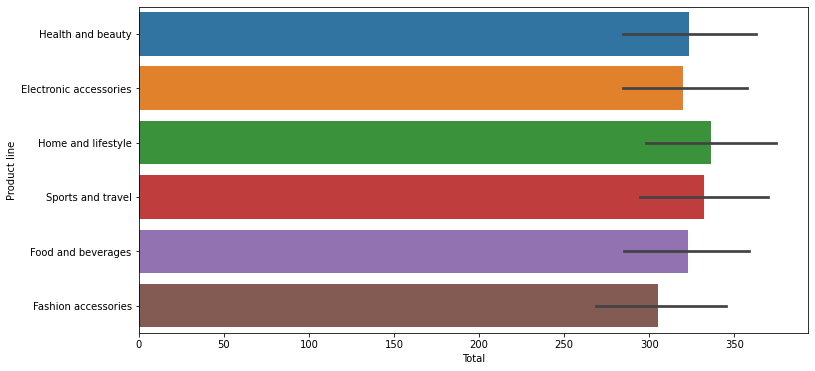

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x=df["Total"],y=df["Product line"]);

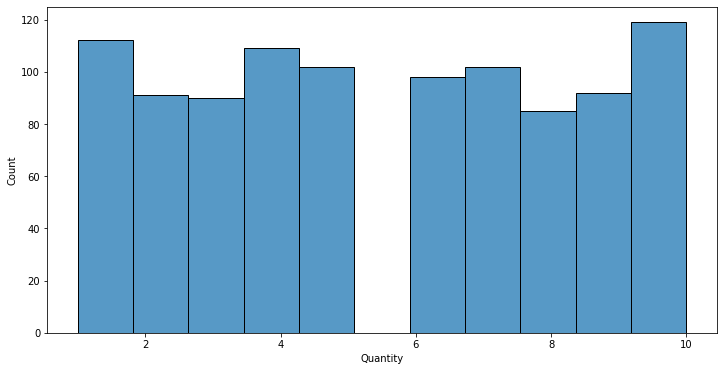

In [47]:
plt.figure(figsize=(12,6))
sns.histplot(df["Quantity"]);

> Miktarlar neredeyse eşit olarak dağıtılmış.

## Korelasyona bakalım!

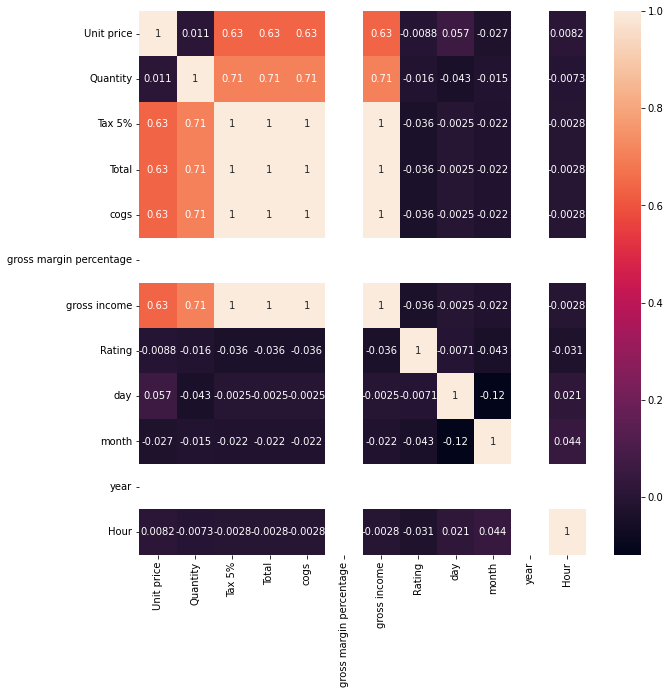

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

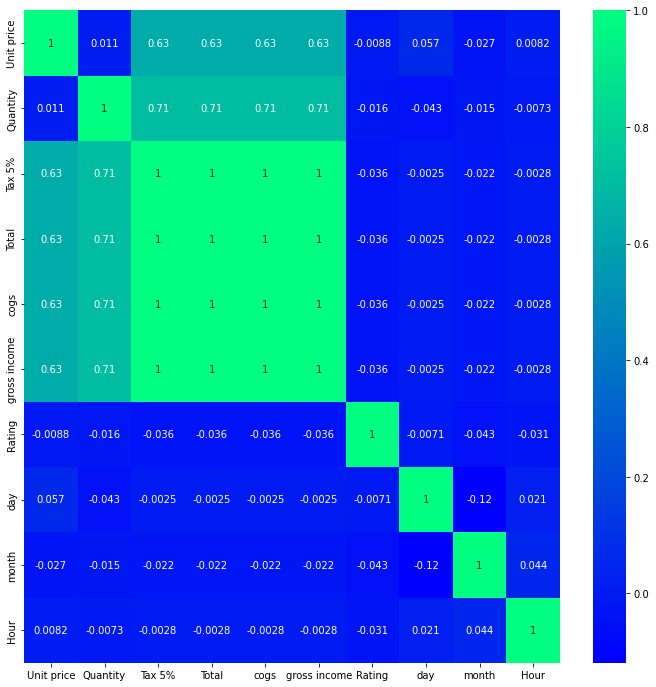

In [49]:
# Daha net görmek için NaN sütunlarını silcem.
plt.figure(figsize=(12,12))
sns.heatmap(df.drop(["gross margin percentage","year"],axis=1).corr(),annot=True,cmap="winter");

---
Size veri ve görselleştirme ve kısa bir veri analizini göstermeye çalıştım. Umarım yardımcı olabilmişimdir 😊


### Yazar:
# Ahmet Talha Bektaş
> ## 📧 [E-mail Hesabım](mailto:atalhabektas@gmail.com)

> ## 🔗 [LinkedIn Hesabım](https://www.linkedin.com/in/ahmet-talha-bekta%C5%9F-056844216)

> ## 💻 [GitHub Hesabım](https://github.com/ahmettalhabektastr)

> ## 👨‍💻 [Kaggle Hesabım](https://www.kaggle.com/ahmettalhabektastr)

> ## 📋 [Medium Hesabım](https://medium.com/@ahmettalhabektas_tr)